In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import numpy as np
xyz = np.loadtxt('/Users/baart_f/Downloads/6650x5000, zonder zandmotor (2).xyz')

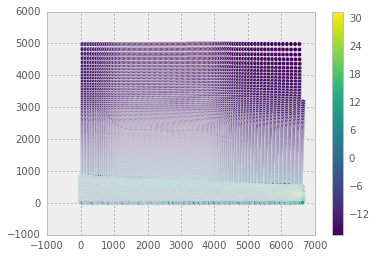

In [3]:
plt.scatter(xyz[:,0], xyz[:,1], c=xyz[:,2], cmap='viridis')
plt.colorbar()

In [4]:
import scipy.spatial

In [5]:
import matplotlib.tri

In [6]:
tri = matplotlib.tri.Triangulation(xyz[:,0], xyz[:,1])
xyz[tri.triangles]

array([[[  5.44389186e+01,   4.98162202e+03,  -1.30165220e+01],
        [  5.41938511e+01,   4.82262836e+03,  -1.29429550e+01],
        [  1.44299683e+02,   4.98096520e+03,  -1.30847730e+01]],

       [[  3.96943705e+03,   4.99092439e+03,  -1.56216950e+01],
        [  3.92811690e+03,   4.99034753e+03,  -1.56545890e+01],
        [  3.93168630e+03,   4.82740797e+03,  -1.54307190e+01]],

       [[  2.21332636e+01,   2.06449358e+01,   1.64681200e+00],
        [  9.37294862e+00,   3.60454021e+01,   1.65550000e+00],
        [  6.73279727e+00,   7.88462082e+00,   1.38293800e+00]],

       ..., 
       [[  4.64050389e+03,   4.96725570e+02,   1.11294370e+01],
        [  4.65590435e+03,   5.09485885e+02,   1.13554380e+01],
        [  4.64314404e+03,   5.24886351e+02,   1.16913750e+01]],

       [[  4.64314404e+03,   5.24886351e+02,   1.16913750e+01],
        [  4.64578419e+03,   5.53047132e+02,   8.41893800e+00],
        [  4.63038372e+03,   5.40286817e+02,   1.08096880e+01]],

       [[  4.6431

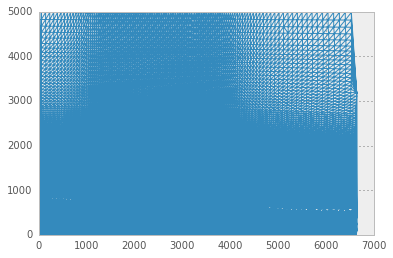

In [7]:
plt.triplot(tri)

In [8]:
def x2bak(x):
    # from 6650m to 1.33m
    result = (x/6650.0)*1.33
    return result
def y2bak(y):
    # from 0,5000 to 1m
    result = (y/5000.0)*1.0
    return result
def z2bak(z):
    # chop
    z[z < -12] = -12
    z[z > 0] *= 0.5
    z[z > 12] = 12
    
    # raise to 0
    z -= -12
    # from 0,24 to 0.20
    result = (z/24.0)*0.2
    return result
xyz_scaled = np.c_[
    x2bak(xyz[:,0].copy()),
    y2bak(xyz[:,1].copy()),
    z2bak(xyz[:,2].copy())
]

In [9]:
import matplotlib.cm
import matplotlib.colors
N = matplotlib.colors.Normalize(xyz[:,2].min(), xyz[:,2].max())



In [10]:
# see https://github.com/dranjan/python-plyfile

vertex = np.array([
        (row[0], row[1], row[2]) 
        for row
        in xyz_scaled.tolist()
    ], dtype=[
        ('x', 'f4'),
        ('y', 'f4'),
        ('z', 'f4')
    ])

facelist = []
for triangle in tri.triangles:
    z_triangle = xyz[triangle[0], 2]
    r, g, b, a = matplotlib.cm.viridis(N(z_triangle), bytes=True)
    facelist.append((triangle, r, g, b))
    
face = np.array(facelist,
                dtype=[
        ('vertex_indices', 'i4', (3,)),
        ('red', 'u1'), ('green', 'u1'),
        ('blue', 'u1')
    ])


In [11]:
import plyfile

ply = plyfile.PlyData([
        plyfile.PlyElement.describe(
                vertex, 'vertex',
                comments=['tetrahedron vertices']
        ),
        plyfile.PlyElement.describe(face, 'face')
    ],
    text=True, 
    byte_order='=',
    comments=['single tetrahedron with colored faces']
)
ply.write('filename.ply')
